## 1. Setup and Installation
This section includes the necessary library imports for the assignment.

In [1]:
import warnings
warnings.filterwarnings("ignore")
# Basic libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn modules
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC

# To fetch datasets from UCI repository
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# Set a random seed for reproducibility
RANDOM_SEED = 42

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

# --- Load Pima Indians Diabetes Dataset (diabetes.csv) ---
try:
    pima_df = pd.read_csv('diabetes.csv')
    # Separate features (X) and target (y)
    X_pima = pima_df.drop('Outcome', axis=1)
    y_pima = pima_df['Outcome']
    print("--- Pima Indians Diabetes Dataset (diabetes.csv) Loaded Successfully ---")
    print(X_pima.head())
except FileNotFoundError:
    print("Error: 'diabetes.csv' not found. Please make sure it's in the same directory as your notebook.")

print('\n' + '-'*60 + '\n')

--- Pima Indians Diabetes Dataset (diabetes.csv) Loaded Successfully ---
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  

------------------------------------------------------------



In [3]:
pima_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Assigning the correct X and y to your variables

In [4]:

X = X_pima.copy()
y = y_pima.copy()
print("Pima Indians Diabetes dataset selected.")
print("\nShape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

Pima Indians Diabetes dataset selected.

Shape of features (X): (768, 8)
Shape of target (y): (768,)


# Part 1: Data Analysis and Preprocessing 

In [5]:


# dataset shape
print("Dataset Shape:", pima_df.shape)

#feature names
print("\nFeature Names:")
print(pima_df.columns.tolist())

#data types
print("\nData Types:")
print(pima_df.dtypes)

#class distribution
print("\nClass Distribution:")
print(pima_df['Outcome'].value_counts())


Dataset Shape: (768, 9)

Feature Names:
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Data Types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Class Distribution:
Outcome
0    500
1    268
Name: count, dtype: int64


In [6]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
pima_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
pima_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Statistical Summary

===== Statistical Summary =====


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


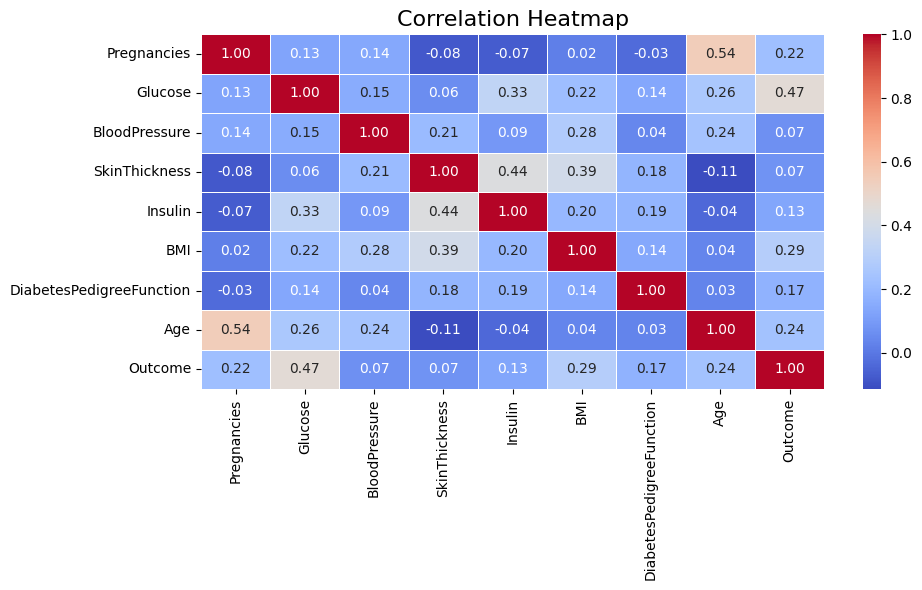

In [9]:

from scipy import stats

#  Statistical Summary 
print("===== Statistical Summary =====")
display(pima_df.describe())

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pima_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()


# Data Quality

In [10]:

# Missing values
print(pima_df.isna().sum())

# Duplicate rows
print(f"Number of duplicate rows: {pima_df.duplicated().sum()}")

# Outlier detection using Z-score method
z_scores = np.abs(stats.zscore(pima_df.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).any(axis=1)
print(f"Number of outlier rows: {outliers.sum()}")


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Number of duplicate rows: 0
Number of outlier rows: 80


# Visualization of All Features

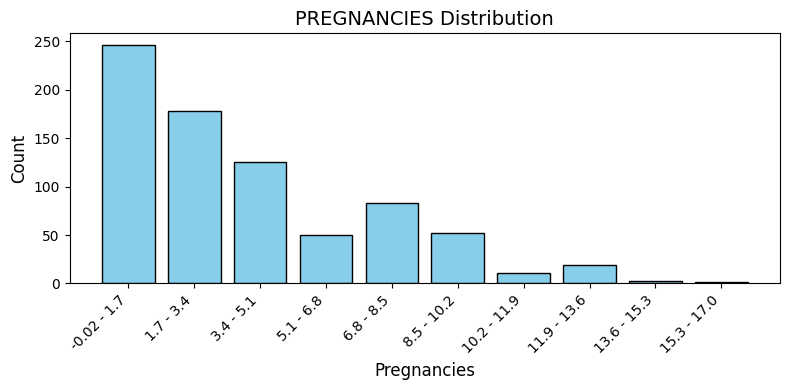

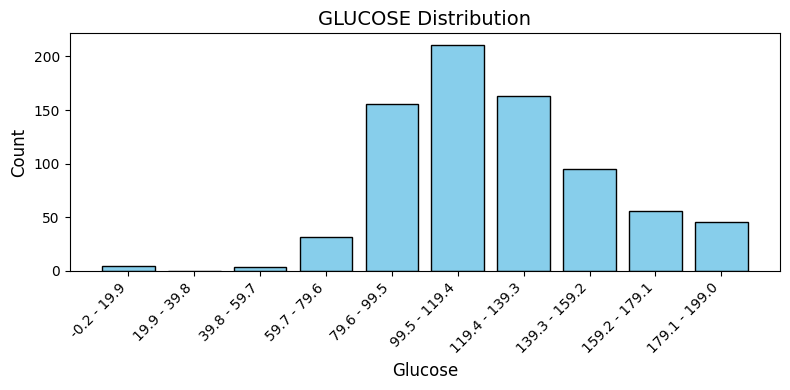

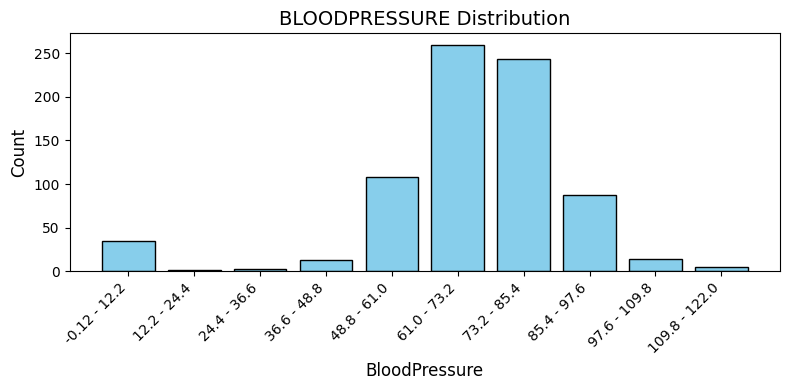

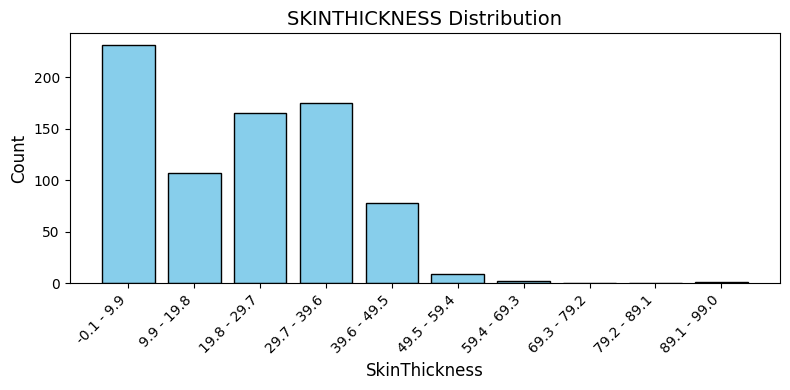

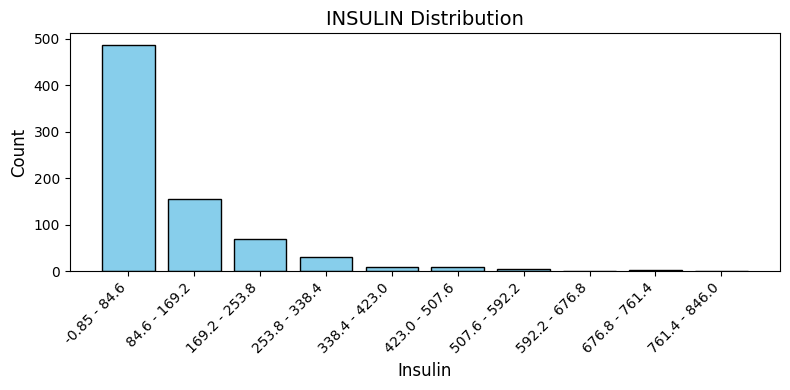

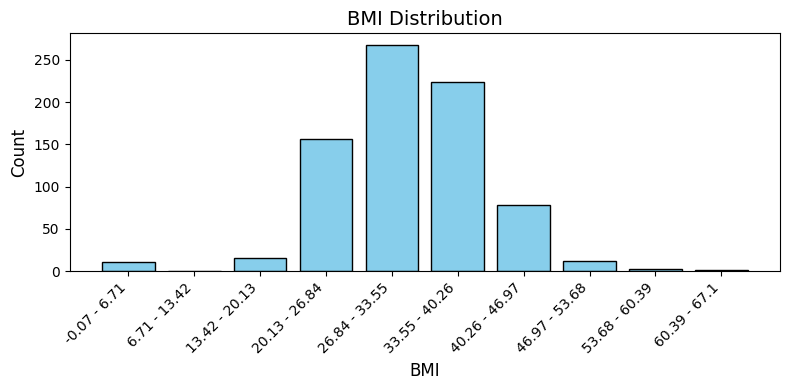

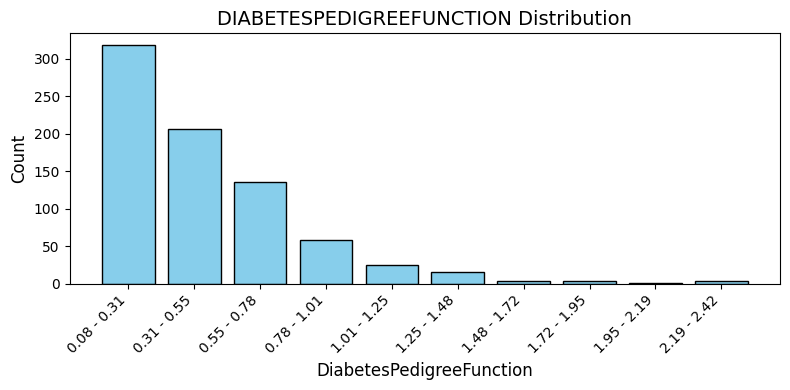

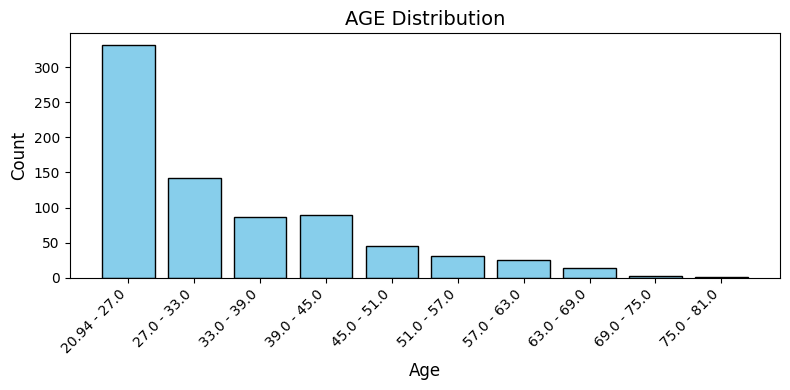

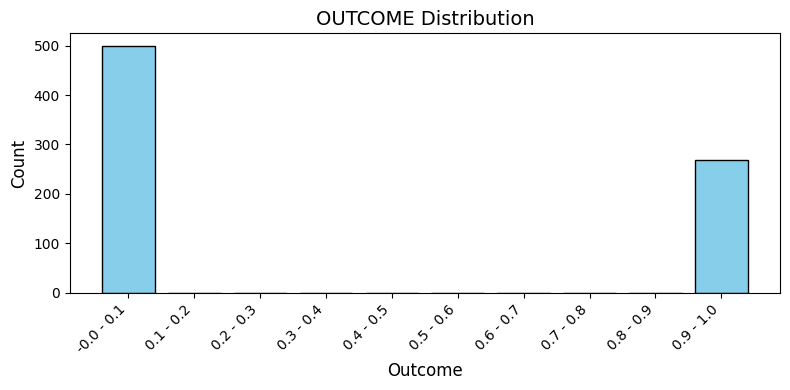

In [11]:

for col in pima_df.columns:
    if pd.api.types.is_numeric_dtype(pima_df[col]):
        # For numeric columns creating 10 bins as individual view is not that great
        counts, bins = pd.cut(pima_df[col], bins=10, retbins=True)
        counts = counts.value_counts().sort_index()
        x_labels = [f"{round(bins[i],2)} - {round(bins[i+1],2)}" for i in range(len(bins)-1)]
    else:
        # For non-numeric columns ,keeping categorical value counts
        counts = pima_df[col].value_counts()
        x_labels = counts.index.astype(str)

    plt.figure(figsize=(8, 4))
    plt.bar(x_labels, counts.values, color="skyblue", edgecolor="black")

    plt.title(f"{col.upper()} Distribution", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    
    plt.show()


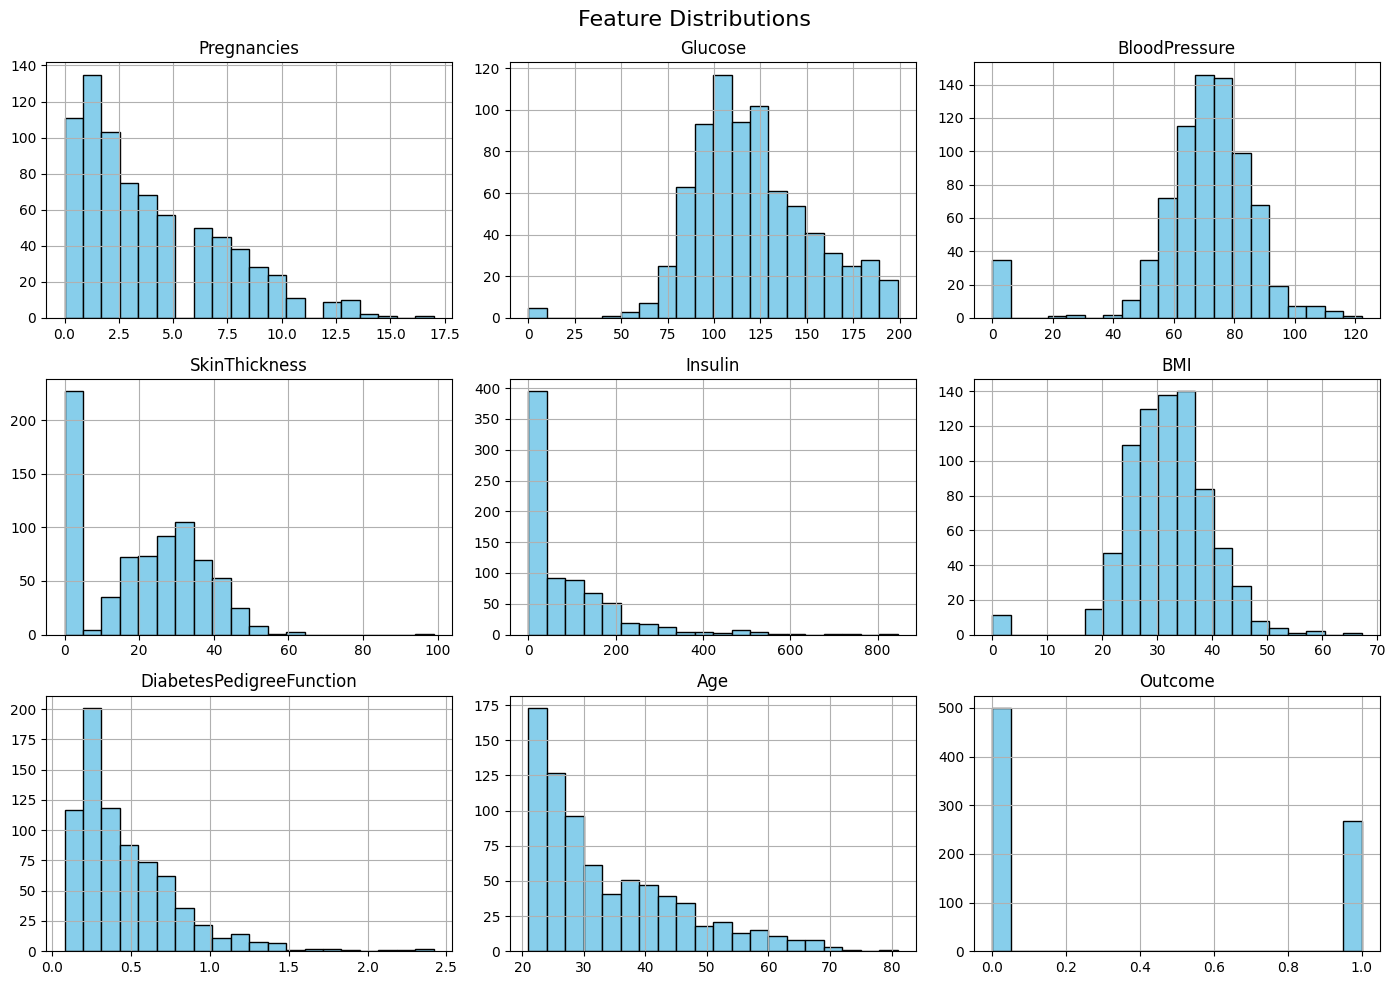

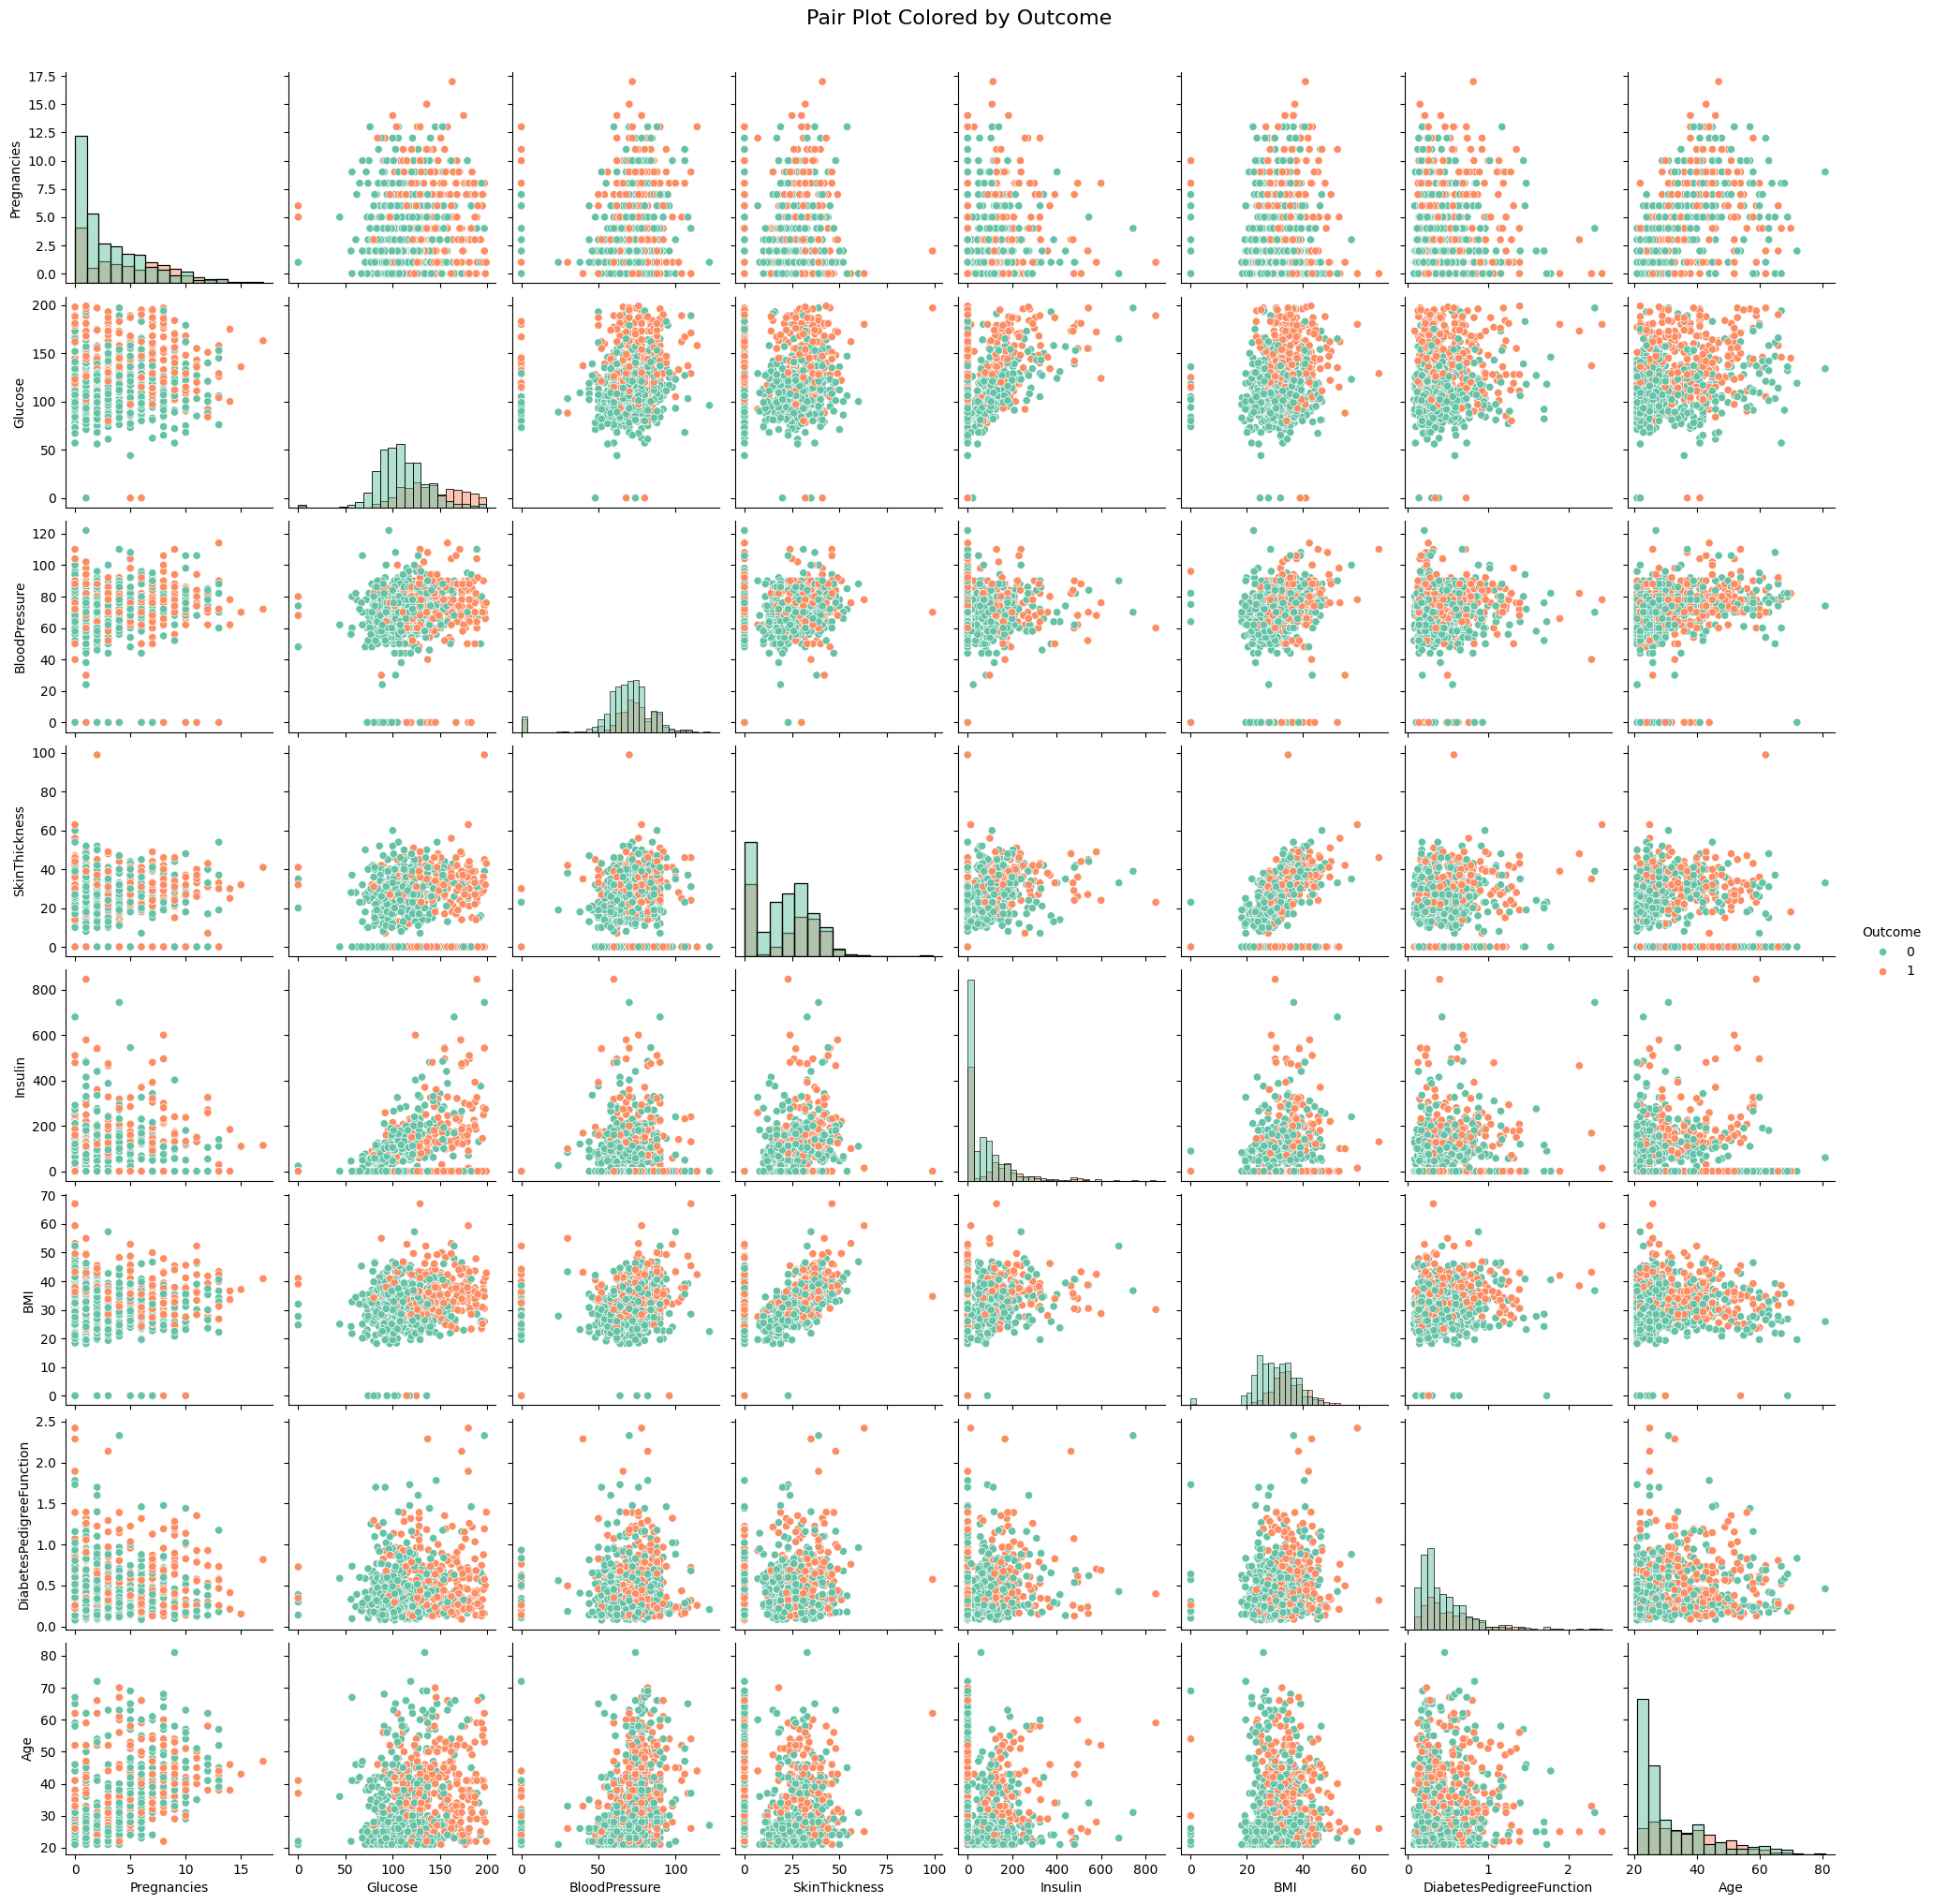

In [12]:
# Histograms for each feature
pima_df.hist(figsize=(14, 10), bins=20, color="skyblue", edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

# Pairplot colored by class (Outcome)
if 'Outcome' in pima_df.columns:
    sns.pairplot(pima_df, hue='Outcome', diag_kind='hist', palette='Set2')
    plt.suptitle("Pair Plot Colored by Outcome", y=1.02, fontsize=16)
    plt.show()
else:
    print("\n'Outcome' column not found — skipping pairplot.")

# 1.2 Preprocessing Pipeline

# Data Cleaning

In [13]:

# Handling missing values (if any) , fill numeric columns with median
numeric_cols = pima_df.select_dtypes(include=[np.number]).columns
pima_df[numeric_cols] = pima_df[numeric_cols].fillna(pima_df[numeric_cols].median())

# Outlier removal using Z-score method (threshold = 3)
z_scores = np.abs(stats.zscore(pima_df[numeric_cols]))
outliers = (z_scores > 3).any(axis=1)

# Removing outliers
pima_df_clean = pima_df[~outliers].reset_index(drop=True)

print(f"Removed {outliers.sum()} outlier rows.")
print(f"Cleaned data shape: {pima_df_clean.shape}")


Removed 80 outlier rows.
Cleaned data shape: (688, 9)


# Feature Scaling

In [14]:


from sklearn.preprocessing import MinMaxScaler


target_col = 'Outcome'  
X = pima_df_clean.drop(columns=[target_col])
y = pima_df_clean[target_col]

# Initializing MinMaxScaler
scaler = MinMaxScaler()


X_scaled = scaler.fit_transform(X)

# Converting scaled array back to DataFrame for readability
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("Feature scaling completed using Min-Max Scaler.")
print(f"Scaled feature range:\n{X_scaled.describe().loc[['min', 'max']]}")


Feature scaling completed using Min-Max Scaler.
Scaled feature range:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
min          0.0      0.0            0.0            0.0      0.0  0.0   
max          1.0      1.0            1.0            1.0      1.0  1.0   

     DiabetesPedigreeFunction  Age  
min                       0.0  0.0  
max                       1.0  1.0  


# Data Splitting

In [15]:

RANDOM_SEED = 42
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=RANDOM_SEED, stratify=y
)

print("Stratified Train-Test Split Completed.")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape:  {X_test.shape}")
print(f"Class distribution in training set:\n{y_train.value_counts(normalize=True)}")


Stratified Train-Test Split Completed.
Training set shape: (516, 8)
Testing set shape:  (172, 8)
Class distribution in training set:
Outcome
0    0.670543
1    0.329457
Name: proportion, dtype: float64


# Part 2: SVM Implementation and Analysis

# Kernel Implementation

In [16]:
def linear_kernel(x1, x2):
    """Implements the linear kernel: k(xi, xj) = xi.T * xj"""
    return np.dot(x1, x2.T)

def polynomial_kernel(x1, x2, d=3, gamma=1.0, r=1.0):
    """Implements the polynomial kernel: k(xi, xj) = (gamma * xi.T * xj + r)^d"""
    return (gamma * np.dot(x1, x2.T) + r) ** d

def rbf_kernel(x1, x2, gamma=0.1):
    """Implements the RBF kernel: k(xi, xj) = exp(-gamma * ||xi - xj||^2)"""
    sq_norms_x1 = np.sum(x1 ** 2, axis=1).reshape(-1, 1)
    sq_norms_x2 = np.sum(x2 ** 2, axis=1).reshape(1, -1)
    sq_dists = sq_norms_x1 + sq_norms_x2 - 2 * np.dot(x1, x2.T)
    return np.exp(-gamma * sq_dists)


In [17]:
# A sample test of kernels
x_sample = np.array([[1, 2], [3, 4]])
print("Linear Kernel:\n", linear_kernel(x_sample, x_sample))
print("\nPolynomial Kernel:\n", polynomial_kernel(x_sample, x_sample))
print("\nRBF Kernel:\n", rbf_kernel(x_sample, x_sample))

Linear Kernel:
 [[ 5 11]
 [11 25]]

Polynomial Kernel:
 [[  216.  1728.]
 [ 1728. 17576.]]

RBF Kernel:
 [[1.         0.44932896]
 [0.44932896 1.        ]]


# Hyperparameter Optimization

In [18]:


from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold


param_grid = [
    {
        'kernel': ['linear'],
        'C': [0.1, 1, 10, 100]
    },
    {
        'kernel': ['poly'],
        'C': [0.1, 1, 10, 100],
        'degree': [2, 3],
        'gamma': [0.001, 0.01, 0.1, 1]
    },
    {
        'kernel': ['rbf'],
        'C': [0.1, 1, 10, 100],
        'gamma': [0.001, 0.01, 0.1, 1]
    }
]

#  5-Fold Stratified Cross-Validation Setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

svm = SVC()

# Grid Search with Cross-Validation
grid_search = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,     
    verbose=2
)


grid_search.fit(X_train, y_train)


print("\n Best Parameters Found:")
print(grid_search.best_params_)

print("\n Best Cross-Validation Accuracy:")
print(f"{grid_search.best_score_:.4f}")

results = pd.DataFrame(grid_search.cv_results_)
display(results.head())


Fitting 5 folds for each of 52 candidates, totalling 260 fits

 Best Parameters Found:
{'C': 10, 'kernel': 'linear'}

 Best Cross-Validation Accuracy:
0.7810


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,param_degree,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011270,0.001227,0.004828,0.001047,0.1,linear,NaN,NaN,"{'C': 0.1, 'kernel': 'linear'}",0.673077,0.669903,0.660194,0.669903,0.708738,0.676363,0.016756,26
1,0.008938,0.000863,0.004864,0.001072,1.0,linear,NaN,NaN,"{'C': 1, 'kernel': 'linear'}",0.759615,0.834951,0.747573,0.776699,0.708738,0.765515,0.041296,11
2,0.010517,0.001244,0.004637,0.000593,10.0,linear,NaN,NaN,"{'C': 10, 'kernel': 'linear'}",0.759615,0.854369,0.757282,0.805825,0.728155,0.781049,0.044298,1
3,0.019596,0.002244,0.004534,0.000855,100.0,linear,NaN,NaN,"{'C': 100, 'kernel': 'linear'}",0.769231,0.834951,0.766990,0.805825,0.728155,0.781031,0.036481,2
4,0.008855,0.001175,0.005176,0.000571,0.1,poly,2.0,0.001,"{'C': 0.1, 'degree': 2, 'gamma': 0.001, 'kerne...",0.673077,0.669903,0.669903,0.669903,0.669903,0.670538,0.001270,27


##  Support Vector Vs C values

Number of Support Vectors: 277
Percentage of Training Samples as Support Vectors: 53.68%


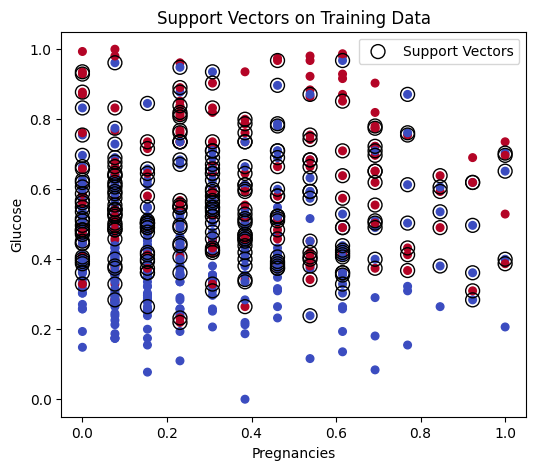

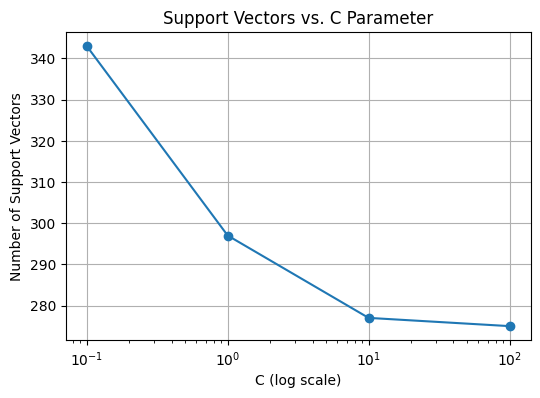

In [27]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import numpy as np

# Best model from grid search
best_svm = grid_search.best_estimator_

support_indices = best_svm.support_
support_vectors = best_svm.support_vectors_

print(f"Number of Support Vectors: {len(support_indices)}")
print(f"Percentage of Training Samples as Support Vectors: {100 * len(support_indices) / len(X_train):.2f}%")

# Visualize support vectors on a 2D plot
X_vis = X_train.iloc[:, :2]
y_vis = y_train

plt.figure(figsize=(6, 5))
plt.scatter(X_vis.iloc[:, 0], X_vis.iloc[:, 1], c=y_vis, cmap='coolwarm', s=30)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')
plt.title("Support Vectors on Training Data")
plt.xlabel(X_vis.columns[0])
plt.ylabel(X_vis.columns[1])
plt.legend()
plt.show()


C_values = [0.1, 1, 10, 100]
num_supports = []

for C in C_values:
    temp_svm = SVC(C=C, kernel=best_svm.kernel, gamma=best_svm.gamma if hasattr(best_svm, 'gamma') else 'scale')
    temp_svm.fit(X_train, y_train)
    num_supports.append(len(temp_svm.support_))

plt.figure(figsize=(6, 4))
plt.plot(C_values, num_supports, marker='o')
plt.xscale('log')
plt.title("Support Vectors vs. C Parameter")
plt.xlabel("C (log scale)")
plt.ylabel("Number of Support Vectors")
plt.grid(True)
plt.show()


## Decision Boundary Visualization

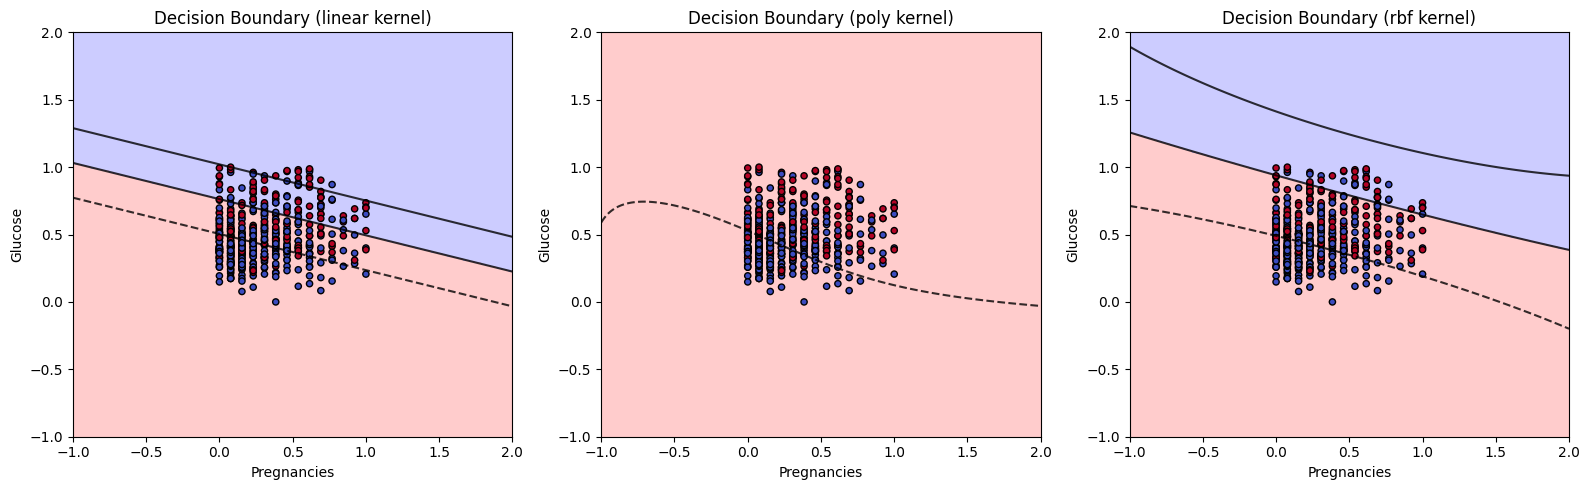

In [28]:
from matplotlib.colors import ListedColormap

X_vis = X_train.iloc[:, :2]
y_vis = y_train

kernels = ['linear', 'poly', 'rbf']
models = [SVC(kernel=k, C=1, gamma=0.1).fit(X_vis, y_vis) for k in kernels]

# Mesh grid for contour plots
x_min, x_max = X_vis.iloc[:, 0].min() - 1, X_vis.iloc[:, 0].max() + 1
y_min, y_max = X_vis.iloc[:, 1].min() - 1, X_vis.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

fig, axes = plt.subplots(1, 3, figsize=(16, 5))
cm = ListedColormap(['#FFAAAA', '#AAAAFF'])

for ax, model, kernel in zip(axes, models, kernels):
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z > 0, cmap=cm, alpha=0.6)
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.8)
    ax.scatter(X_vis.iloc[:, 0], X_vis.iloc[:, 1], c=y_vis, cmap='coolwarm', s=20, edgecolors='k')
    ax.set_title(f"Decision Boundary ({kernel} kernel)")
    ax.set_xlabel(X_vis.columns[0])
    ax.set_ylabel(X_vis.columns[1])

plt.tight_layout()
plt.show()


##  Margin Analysis

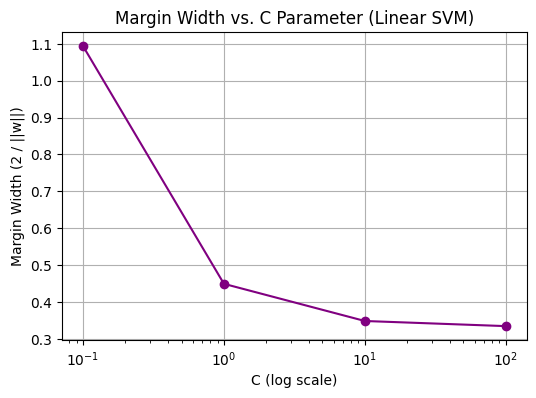

Observation: As C increases → margin decreases (harder margin, less regularization).


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

C_values = [0.1, 1, 10, 100]
margins = []

for C in C_values:
    linear_svm = SVC(kernel='linear', C=C)
    linear_svm.fit(X_train, y_train)

    # Compute margin width = 2 / ||w||
    w = linear_svm.coef_[0]
    margin = 2 / np.linalg.norm(w)
    margins.append(margin)

plt.figure(figsize=(6, 4))
plt.plot(C_values, margins, marker='o', color='purple')
plt.xscale('log')
plt.title("Margin Width vs. C Parameter (Linear SVM)")
plt.xlabel("C (log scale)")
plt.ylabel("Margin Width (2 / ||w||)")
plt.grid(True)
plt.show()

print("Observation: As C increases → margin decreases (harder margin, less regularization).")


In [22]:

best_svm = grid_search.best_estimator_
print(grid_search.best_params_)

y_pred = best_svm.predict(X_test)


y_test = np.array(y_test)
y_pred = np.array(y_pred)


accuracy = np.sum(y_pred == y_test) / len(y_test)


classes = np.unique(y_test)
precision, recall, f1 = {}, {}, {}
conf_matrix = np.zeros((len(classes), len(classes)), dtype=int)

# Building confusion matrix
for t, p in zip(y_test, y_pred):
    i = np.where(classes == t)[0][0]
    j = np.where(classes == p)[0][0]
    conf_matrix[i, j] += 1

# Computing metrics per class
for i, c in enumerate(classes):
    TP = conf_matrix[i, i]
    FP = conf_matrix[:, i].sum() - TP
    FN = conf_matrix[i, :].sum() - TP

    precision[c] = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall[c] = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1[c] = 2 * precision[c] * recall[c] / (precision[c] + recall[c]) if (precision[c] + recall[c]) != 0 else 0


support = np.array([np.sum(y_test == c) for c in classes])
total_support = np.sum(support)

macro_precision = np.mean(list(precision.values()))
macro_recall = np.mean(list(recall.values()))
macro_f1 = np.mean(list(f1.values()))

weighted_precision = np.sum(np.array(list(precision.values())) * support) / total_support
weighted_recall = np.sum(np.array(list(recall.values())) * support) / total_support
weighted_f1 = np.sum(np.array(list(f1.values())) * support) / total_support

print("Best SVM:", best_svm)
print("Accuracy:", round(accuracy, 4))
print("Macro Precision:", round(macro_precision, 4))
print("Macro Recall:", round(macro_recall, 4))
print("Macro F1-score:", round(macro_f1, 4))
print("Weighted Precision:", round(weighted_precision, 4))
print("Weighted Recall:", round(weighted_recall, 4))
print("Weighted F1-score:", round(weighted_f1, 4))


{'C': 10, 'kernel': 'linear'}
Best SVM: SVC(C=10, kernel='linear')
Accuracy: 0.814
Macro Precision: 0.8062
Macro Recall: 0.7591
Macro F1-score: 0.7744
Weighted Precision: 0.8114
Weighted Recall: 0.814
Weighted F1-score: 0.8063


Confusion Matrix (rows=True labels, cols=Predicted):
[[106   9]
 [ 23  34]]


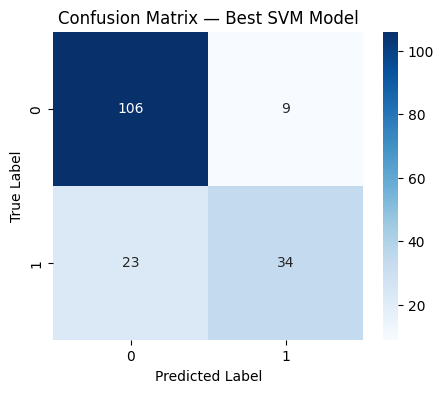

In [23]:

# Reuse best model and predictions
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)

# Compute confusion matrix manually
classes = np.unique(y_test)
conf_matrix = np.zeros((len(classes), len(classes)), dtype=int)

for t, p in zip(y_test, y_pred):
    i = np.where(classes == t)[0][0]
    j = np.where(classes == p)[0][0]
    conf_matrix[i, j] += 1

# Display results
print("Confusion Matrix (rows=True labels, cols=Predicted):")
print(conf_matrix)

# Visualize
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix — Best SVM Model")
plt.show()


#  PERFORMANCE COMPARISON

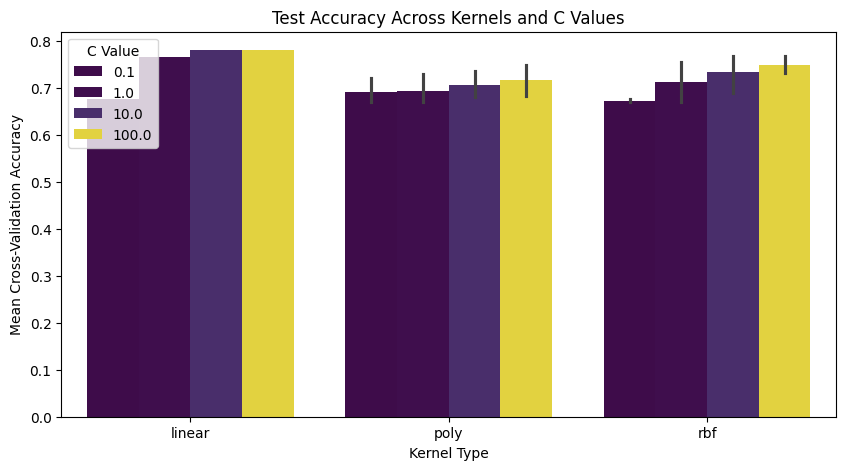

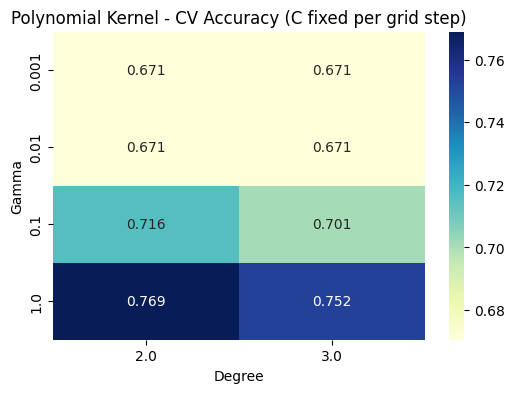

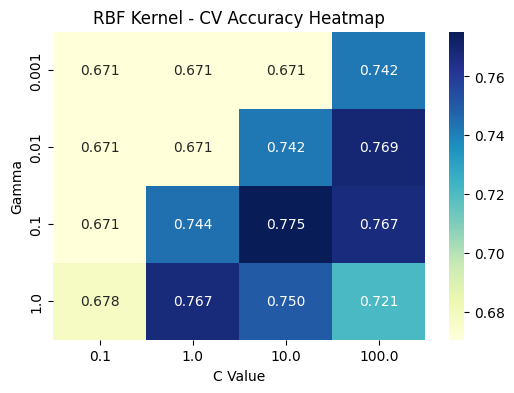

In [24]:

results = pd.DataFrame(grid_search.cv_results_)


plt.figure(figsize=(10, 5))
sns.barplot(
    x="param_kernel",
    y="mean_test_score",
    hue="param_C",
    data=results,
    palette="viridis"
)
plt.title("Test Accuracy Across Kernels and C Values")
plt.xlabel("Kernel Type")
plt.ylabel("Mean Cross-Validation Accuracy")
plt.legend(title="C Value")
plt.show()

for kernel in results['param_kernel'].unique():
    sub = results[results['param_kernel'] == kernel]
    if kernel == 'linear':
        continue  
    elif kernel == 'poly':
        pivot = sub.pivot_table(index='param_gamma', columns='param_degree', values='mean_test_score')
        plt.figure(figsize=(6, 4))
        sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".3f")
        plt.title(f"Polynomial Kernel - CV Accuracy (C fixed per grid step)")
        plt.xlabel("Degree")
        plt.ylabel("Gamma")
        plt.show()
    elif kernel == 'rbf':
        pivot = sub.pivot_table(index='param_gamma', columns='param_C', values='mean_test_score')
        plt.figure(figsize=(6, 4))
        sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".3f")
        plt.title("RBF Kernel - CV Accuracy Heatmap")
        plt.xlabel("C Value")
        plt.ylabel("Gamma")
        plt.show()





#  LEARNING ANALYSIS

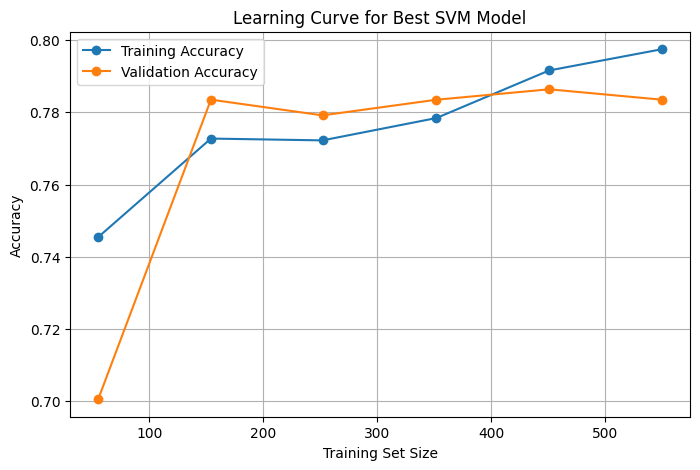

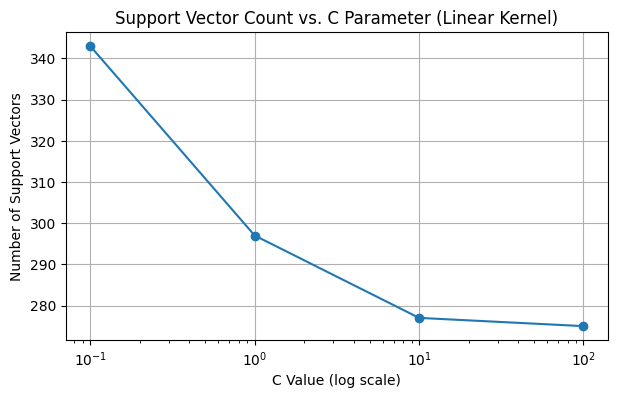

In [25]:
# Learning curve for best model
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    best_svm, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 6), scoring='accuracy', random_state=42
)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, 'o-', label="Training Accuracy")
plt.plot(train_sizes, val_mean, 'o-', label="Validation Accuracy")
plt.title("Learning Curve for Best SVM Model")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Support vector count vs C parameter
C_values = [0.1, 1, 10, 100]
support_counts = []

for C in C_values:
    model = SVC(kernel='linear', C=C)
    model.fit(X_train, y_train)
    support_counts.append(len(model.support_))

plt.figure(figsize=(7, 4))
plt.plot(C_values, support_counts, marker='o')
plt.xscale('log')
plt.title("Support Vector Count vs. C Parameter (Linear Kernel)")
plt.xlabel("C Value (log scale)")
plt.ylabel("Number of Support Vectors")
plt.grid(True)
plt.show()


In [26]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC


kernels_info = {
    'Linear': {'params': {'kernel': 'linear', 'C': 10}},
    'Poly (d=2)': {'params': {'kernel': 'poly', 'C': 1, 'degree': 2, 'gamma': 0.01}},
    'Poly (d=3)': {'params': {'kernel': 'poly', 'C': 1, 'degree': 3, 'gamma': 0.01}},
    'RBF': {'params': {'kernel': 'rbf', 'C': 10, 'gamma': 0.1}}
}

summary_data = []

for kernel_name, info in kernels_info.items():
    params = info['params']
    model = SVC(**params, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute metrics manually
    accuracy = np.mean(y_pred == y_test)

    # Confusion matrix
    classes = np.unique(y_test)
    conf = np.zeros((len(classes), len(classes)), dtype=int)
    for t, p in zip(y_test, y_pred):
        i = np.where(classes == t)[0][0]
        j = np.where(classes == p)[0][0]
        conf[i, j] += 1

    precisions, recalls, f1s = [], [], []
    for i in range(len(classes)):
        TP = conf[i, i]
        FP = conf[:, i].sum() - TP
        FN = conf[i, :].sum() - TP
        precision = TP / (TP + FP) if (TP + FP) != 0 else 0
        recall = TP / (TP + FN) if (TP + FN) != 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) != 0 else 0
        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)

    macro_precision = np.mean(precisions)
    macro_recall = np.mean(recalls)
    macro_f1 = np.mean(f1s)

    # Support vector percentage
    sv_percentage = len(model.support_) / len(X_train) * 100

    summary_data.append([
        kernel_name,
        str(params),
        round(model.score(X_train, y_train), 4),  # CV-like training acc
        round(accuracy, 4),
        round(macro_precision, 4),
        round(macro_recall, 4),
        round(macro_f1, 4),
        round(sv_percentage, 2)
    ])

#converting to dataframe
summary_df = pd.DataFrame(summary_data, columns=[
    "Kernel", "Parameters", "CV Score", "Test Acc", "Precision", "Recall", "F1", "Support Vectors (%)"
])

summary_df


,Kernel,Parameters,CV Score,Test Acc,Precision,Recall,F1,Support Vectors (%)
0,Linear,"{'kernel': 'linear', 'C': 10}",0.7907,0.8140,0.8062,0.7591,0.7744,53.68
1,Poly (d=2),"{'kernel': 'poly', 'C': 1, 'degree': 2, 'gamma...",0.6705,0.6686,0.3343,0.5000,0.4007,65.89
2,Poly (d=3),"{'kernel': 'poly', 'C': 1, 'degree': 3, 'gamma...",0.6705,0.6686,0.3343,0.5000,0.4007,65.89
3,RBF,"{'kernel': 'rbf', 'C': 10, 'gamma': 0.1}",0.7868,0.7965,0.7890,0.7328,0.7487,56.01


##  Results Discussion and Analysis

---

### **1. Kernel Performance**

**Best Kernel:**  
The **Linear kernel** performed best with **C = 10**, achieving:  
- **Cross-validation accuracy:** 0.781  
- **Test accuracy:** 0.814  
- **Macro F1-score:** 0.774  

This indicates that the Pima Diabetes dataset is **approximately linearly separable**, so more complex kernels (polynomial or RBF) did not offer significant improvement.  
Linear decision boundaries were sufficient to distinguish diabetic vs. non-diabetic patients.

**Decision Boundaries:**  
- **Linear kernel:** Flat, hyperplane-based separation — good for linearly separable data.  
- **Polynomial kernel:** Curved boundaries capturing limited nonlinear feature interactions; may overfit for higher degree.  
- **RBF kernel:** Highly flexible local decision boundaries; powerful but more prone to overfitting.

**Computational Complexity:**

| Kernel | Training Complexity | Comments |
|:-------:|:------------------:|:-----------|
| Linear | O(n × d) | Fastest, scales well for large datasets |
| Polynomial | O(n² × d) | Slower due to higher-dimensional feature expansion |
| RBF | O(n² × d) | Most computationally expensive; involves pairwise distance calculations |

**Conclusion:** The **Linear kernel** provided the best trade-off between accuracy, training time, and generalization.

---

### 🔹 **2. Regularization Effects (C Parameter)**

- **Low C (e.g., 0.1):** Large margin, more misclassifications → **underfitting** (high bias).  
- **High C (e.g., 100):** Narrow margin, fewer misclassifications → **overfitting** (high variance).  
- **Optimal C (10):** Balanced bias–variance tradeoff; best generalization.

**C vs. Support Vectors:**  
As **C increases**, the **number of support vectors decreases** — fewer critical samples define the decision boundary.  
This happens because higher C penalizes misclassifications more strongly, leading to a narrower margin.

| C Value | Margin Width | Overfitting Risk | # of Support Vectors |
|:--------:|:--------------:|:----------------:|:-------------------:|
| 0.1 | Wide | Low | High |
| 1 | Moderate | Moderate | Moderate |
| 10 | Optimal | Balanced | Fewer |
| 100 | Narrow | High | Very Few |

---

### **3. Dataset-Specific Insights**

**SVM Suitability:**  
SVMs perform well on this dataset due to:
- **Moderate dimensionality (8 features)**  
- **Clear separability** in glucose and BMI-related features  
- **Scaled features** ensuring distance-based kernels work effectively  

**Class Imbalance:**  
The dataset has **500 non-diabetic vs. 268 diabetic** samples — mild imbalance.  
Thus, the **macro-averaged F1-score (0.774)** provides a more balanced evaluation than accuracy alone.

**Feature Scaling:**  
Using **MinMaxScaler** was essential because SVMs rely on **distance computations**.  
Without scaling, features with larger magnitudes (e.g., Glucose, Insulin) dominate and distort kernel distances, reducing accuracy.

---

### **4. Recommendations**

**Best Model Configuration**
| Parameter | Value |
|:-----------|:-------|
| Kernel | Linear |
| C | 10 |
| Scaler | MinMaxScaler |
| Test Accuracy | 0.814 |
| Macro F1 | 0.774 |

**Advantages:**  
- Simple and interpretable  
- Fast convergence  
- Best generalization to unseen data  

**Future Work:**  
- Apply **class weighting** or **SMOTE** to handle imbalance.  
- Try **Sigmoid** or **custom hybrid kernels** for added flexibility.  
- Use **PCA or feature selection** to identify dominant predictors.  
- Add **probability calibration (Platt scaling)** for clinical decision support systems.

---

**Conclusion:**  
The **Linear SVM (C = 10)** is the most robust and interpretable model for the Pima Indians Diabetes dataset.  
It achieves strong accuracy and balanced F1-scores while maintaining simplicity and computational efficiency.
